In [57]:
from util import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
import xgboost as xgb
import seaborn as ses
import matplotlib.pyplot as plt

In [2]:
train_all = load_train()
test_all = load_testA()
shop_info = load_shop_info()

In [3]:
mall_id = "m_690"
df, train_cache, test_cache = get_wifi_cache(mall_id)
train_index = train_cache[0]
train_use_wifi = train_cache[1]
train_matrix = train_cache[2]
train = train_all[train_all.mall_id == mall_id]
shops = shop_info[shop_info.mall_id==mall_id].shop_id.unique()
label_encoder =  LabelEncoder().fit(shops)
y = label_encoder.transform(train.shop_id)
train_x, test_x,train_y,test_y  = train_test_split(train_matrix,y)

In [5]:
train = xgb.DMatrix(train_x,label=train_y)
test = xgb.DMatrix(test_x,label=test_y)
evals = [(train,"train"),(test,"test")]
num_class = len(shops)
# 模型参数
objective = "multi:softmax"
eval_metric = "merror"
eta = 0.02
max_depth = 10
subsample = 0.8
colsample_bytree = 0.8
min_child_weight = 5
gamma = 1
alpha = 0
_lambda = 0
n_round = 100
early_stop_rounds = 3

In [ ]:
bst = xgb.train({
        "objective": objective,
        "eval_metric": eval_metric,
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "min_child_weight": min_child_weight,
        "gamma": gamma,
        "alpha": alpha,
        "lambda": _lambda,
        "num_class": num_class,
        "silent": 1,
    },
            train,
            n_round,
            evals=evals,
            early_stopping_rounds=early_stop_rounds)

In [2]:
train = load_train()

In [3]:
preprocess_basic_wifi(train)


,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,basic_wifi_info,wifi_size,use_wifi_size,no_use_wifi_size,use_wifi_freq,no_use_wifi_freq
0,u_376,s_2871718,2017-08-06 21:20,122.308291,32.088040,b_6396480|-67|false;b_41124514|-86|false;b_287...,c_38,122.308782,32.087894,42,m_1409,"(10, [], [(b_6396480, -67), (b_41124514, -86),...",10,0,10,0.000000,1.000000
1,u_376,s_2871718,2017-08-06 21:20,122.308162,32.087970,b_6396480|-67|false;b_56328155|-73|false;b_411...,c_38,122.308782,32.087894,42,m_1409,"(10, [], [(b_6396480, -67), (b_56328155, -73),...",10,0,10,0.000000,1.000000
2,u_1041,s_181637,2017-08-02 13:10,117.365255,40.638214,b_8006367|-78|false;b_2485110|-52|false;b_3005...,c_30,117.365996,40.638634,40,m_4079,"(10, [], [(b_8006367, -78), (b_2485110, -52), ...",10,0,10,0.000000,1.000000
3,u_1158,s_609470,2017-08-13 12:30,121.134451,31.197416,b_26250579|-73|false;b_26250580|-64|false;b_26...,c_27,121.134561,31.197322,49,m_6587,"(10, [], [(b_26250579, -73), (b_26250580, -64)...",10,0,10,0.000000,1.000000
4,u_1654,s_3816766,2017-08-25 19:50,122.255867,31.351320,b_39004150|-66|false;b_39004148|-58|false;b_21...,c_6,122.255616,31.351461,62,m_3005,"(10, [], [(b_39004150, -66), (b_39004148, -58)...",10,0,10,0.000000,1.000000
5,u_2733,s_3686420,2017-08-28 13:10,122.595277,31.581963,b_13784698|-75|false;b_7390858|-86|false;b_358...,c_34,122.596141,31.581731,40,m_3839,"(10, [], [(b_13784698, -75), (b_7390858, -86),...",10,0,10,0.000000,1.000000
6,u_2848,s_89874,2017-08-11 14:20,104.815313,30.962847,b_975810|-33|true;b_975807|-41|false;b_3506304...,c_49,104.815435,30.963022,62,m_1920,"(10, [(b_975810, -33)], [(b_975807, -41), (b_3...",10,1,9,0.100000,0.900000
7,u_3063,s_939447,2017-08-06 14:50,117.913713,39.589681,b_15263246|-67|false;b_10120963|-76|false;b_41...,c_28,117.914173,39.589755,40,m_2878,"(10, [(b_25781993, -60)], [(b_15263246, -67), ...",10,1,9,0.100000,0.900000
8,u_3063,s_939447,2017-08-02 17:30,117.913765,39.589699,b_37749132|-77|false;b_25781349|-63|false;b_25...,c_28,117.914173,39.589755,40,m_2878,"(10, [(b_25781993, -59)], [(b_37749132, -77), ...",10,1,9,0.100000,0.900000
9,u_3063,s_3698335,2017-08-02 18:30,117.914182,39.589539,b_39846139|-73|false;b_25673942|-61|false;b_25...,c_25,117.914142,39.589296,54,m_2878,"(10, [], [(b_39846139, -73), (b_25673942, -61)...",10,0,10,0.000000,1.000000


In [14]:
part_train = train[train.mall_id == "m_690"]
preprocess_basic_time(part_train)

/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,...,basic_wifi_info,wifi_size,use_wifi_size,no_use_wifi_size,use_wifi_freq,no_use_wifi_freq,dt,weekday,hour,is_weekend
10,u_3604,s_149642,2017-08-15 09:40,122.346922,31.834588,b_33798074|-90|false;b_30210843|-66|false;b_50...,c_29,122.346934,31.834289,44,...,"(10, [(b_21741453, -71)], [(b_33798074, -90), ...",10,1,9,0.100000,0.900000,2017-08-15 09:40:00,1,9,0
43,u_9950,s_149642,2017-08-06 13:50,122.346942,31.834576,b_25145248|-55|false;b_17791227|-78|false;b_31...,c_29,122.346934,31.834289,44,...,"(10, [], [(b_25145248, -55), (b_17791227, -78)...",10,0,10,0.000000,1.000000,2017-08-06 13:50:00,6,13,1
56,u_11919,s_767494,2017-08-10 12:30,122.347307,31.833840,b_4121837|-53|false;b_1064727|-52|false;b_7446...,c_38,122.346890,31.834329,38,...,"(10, [], [(b_4121837, -53), (b_1064727, -52), ...",10,0,10,0.000000,1.000000,2017-08-10 12:30:00,3,12,0
57,u_11919,s_5947,2017-08-10 12:30,122.347347,31.833675,b_15853307|-69|false;b_13587700|-57|false;b_15...,c_26,122.346802,31.833697,52,...,"(10, [], [(b_15853307, -69), (b_13587700, -57)...",10,0,10,0.000000,1.000000,2017-08-10 12:30:00,3,12,0
112,u_22061,s_9147,2017-08-12 08:10,122.346780,31.833581,b_18988859|-62|true;b_33161184|-74|false;b_744...,c_29,122.346026,31.833803,50,...,"(10, [(b_18988859, -62)], [(b_33161184, -74), ...",10,1,9,0.100000,0.900000,2017-08-12 08:10:00,5,8,1
113,u_22061,s_9147,2017-08-13 09:00,122.346547,31.834222,b_22076003|-79|false;b_7446880|-52|false;b_139...,c_29,122.346026,31.833803,50,...,"(10, [(b_18988859, -65)], [(b_22076003, -79), ...",10,1,9,0.100000,0.900000,2017-08-13 09:00:00,6,9,1
134,u_25439,s_298312,2017-08-11 18:20,122.346678,31.834848,b_7446873|-68|false;b_4121858|-68|false;b_2075...,c_30,122.347259,31.835233,47,...,"(10, [], [(b_7446873, -68), (b_4121858, -68), ...",10,0,10,0.000000,1.000000,2017-08-11 18:20:00,4,18,0
145,u_28573,s_1425466,2017-08-10 17:30,122.346092,31.834361,b_13587603|-63|false;b_15004727|-84|false;b_14...,c_50,122.346890,31.834329,61,...,"(10, [], [(b_13587603, -63), (b_15004727, -84)...",10,0,10,0.000000,1.000000,2017-08-10 17:30:00,3,17,0
194,u_34343,s_149642,2017-08-06 19:20,122.346926,31.834624,b_22076003|-64|false;b_30210843|-74|false;b_50...,c_29,122.346934,31.834289,44,...,"(10, [], [(b_22076003, -64), (b_30210843, -74)...",10,0,10,0.000000,1.000000,2017-08-06 19:20:00,6,19,1
195,u_34343,s_2833968,2017-08-06 20:30,122.347034,31.835049,b_15412066|-79|false;b_13587681|-78|false;b_74...,c_24,122.347027,31.835118,59,...,"(10, [(b_28096744, -32)], [(b_15412066, -79), ...",10,1,9,0.100000,0.900000,2017-08-06 20:30:00,6,20,1


In [11]:
all_sorted_wifi = get_sorted_wifi([part_train])

In [23]:
all_sorted_wifi[:10]

[('b_22076003', 2637),
 ('b_21073988', 2226),
 ('b_52593796', 2007),
 ('b_4747788', 1937),
 ('b_35548234', 1933),
 ('b_18522118', 1886),
 ('b_53969738', 1873),
 ('b_50360261', 1812),
 ('b_39876637', 1788),
 ('b_10413038', 1783)]

In [17]:
weekday1_train = part_train[part_train.weekday == 1]

In [21]:
weekday1_sorted_wifi = get_sorted_wifi([weekday1_train])

In [22]:
weekday1_sorted_wifi[:10]

[('b_22076003', 428),
 ('b_21073988', 349),
 ('b_4747788', 335),
 ('b_52593796', 318),
 ('b_50360261', 293),
 ('b_18522118', 290),
 ('b_21328234', 289),
 ('b_35548234', 279),
 ('b_50360262', 279),
 ('b_17791227', 274)]

In [24]:
shangwu = part_train[part_train.dt.dt.hour <=12]
xiawu = part_train[part_train.dt.dt.hour > 12]

In [25]:
get_sorted_wifi([shangwu])[:10]


[('b_22076003', 1082),
 ('b_21073988', 955),
 ('b_50360261', 850),
 ('b_4747788', 846),
 ('b_30210843', 845),
 ('b_50360262', 786),
 ('b_52593796', 776),
 ('b_17791227', 676),
 ('b_13945889', 672),
 ('b_34652512', 641)]

In [26]:
get_sorted_wifi([xiawu])[:10]

[('b_22076003', 1555),
 ('b_53969738', 1481),
 ('b_35548234', 1383),
 ('b_18522118', 1321),
 ('b_21073988', 1271),
 ('b_10413038', 1244),
 ('b_39876637', 1237),
 ('b_53969737', 1231),
 ('b_52593796', 1231),
 ('b_21328234', 1112)]

In [29]:
preprocess_basic_time(train)

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,...,basic_wifi_info,wifi_size,use_wifi_size,no_use_wifi_size,use_wifi_freq,no_use_wifi_freq,dt,weekday,hour,is_weekend
0,u_376,s_2871718,2017-08-06 21:20,122.308291,32.088040,b_6396480|-67|false;b_41124514|-86|false;b_287...,c_38,122.308782,32.087894,42,...,"(10, [], [(b_6396480, -67), (b_41124514, -86),...",10,0,10,0.000000,1.000000,2017-08-06 21:20:00,6,21,1
1,u_376,s_2871718,2017-08-06 21:20,122.308162,32.087970,b_6396480|-67|false;b_56328155|-73|false;b_411...,c_38,122.308782,32.087894,42,...,"(10, [], [(b_6396480, -67), (b_56328155, -73),...",10,0,10,0.000000,1.000000,2017-08-06 21:20:00,6,21,1
2,u_1041,s_181637,2017-08-02 13:10,117.365255,40.638214,b_8006367|-78|false;b_2485110|-52|false;b_3005...,c_30,117.365996,40.638634,40,...,"(10, [], [(b_8006367, -78), (b_2485110, -52), ...",10,0,10,0.000000,1.000000,2017-08-02 13:10:00,2,13,0
3,u_1158,s_609470,2017-08-13 12:30,121.134451,31.197416,b_26250579|-73|false;b_26250580|-64|false;b_26...,c_27,121.134561,31.197322,49,...,"(10, [], [(b_26250579, -73), (b_26250580, -64)...",10,0,10,0.000000,1.000000,2017-08-13 12:30:00,6,12,1
4,u_1654,s_3816766,2017-08-25 19:50,122.255867,31.351320,b_39004150|-66|false;b_39004148|-58|false;b_21...,c_6,122.255616,31.351461,62,...,"(10, [], [(b_39004150, -66), (b_39004148, -58)...",10,0,10,0.000000,1.000000,2017-08-25 19:50:00,4,19,0
5,u_2733,s_3686420,2017-08-28 13:10,122.595277,31.581963,b_13784698|-75|false;b_7390858|-86|false;b_358...,c_34,122.596141,31.581731,40,...,"(10, [], [(b_13784698, -75), (b_7390858, -86),...",10,0,10,0.000000,1.000000,2017-08-28 13:10:00,0,13,0
6,u_2848,s_89874,2017-08-11 14:20,104.815313,30.962847,b_975810|-33|true;b_975807|-41|false;b_3506304...,c_49,104.815435,30.963022,62,...,"(10, [(b_975810, -33)], [(b_975807, -41), (b_3...",10,1,9,0.100000,0.900000,2017-08-11 14:20:00,4,14,0
7,u_3063,s_939447,2017-08-06 14:50,117.913713,39.589681,b_15263246|-67|false;b_10120963|-76|false;b_41...,c_28,117.914173,39.589755,40,...,"(10, [(b_25781993, -60)], [(b_15263246, -67), ...",10,1,9,0.100000,0.900000,2017-08-06 14:50:00,6,14,1
8,u_3063,s_939447,2017-08-02 17:30,117.913765,39.589699,b_37749132|-77|false;b_25781349|-63|false;b_25...,c_28,117.914173,39.589755,40,...,"(10, [(b_25781993, -59)], [(b_37749132, -77), ...",10,1,9,0.100000,0.900000,2017-08-02 17:30:00,2,17,0
9,u_3063,s_3698335,2017-08-02 18:30,117.914182,39.589539,b_39846139|-73|false;b_25673942|-61|false;b_25...,c_25,117.914142,39.589296,54,...,"(10, [], [(b_39846139, -73), (b_25673942, -61)...",10,0,10,0.000000,1.000000,2017-08-02 18:30:00,2,18,0


In [34]:
(train.dt.dt.hour < 5).sum()

2681

In [36]:
train0_4 = train[train.dt.dt.hour < 5]
train0_4_mallids = train0_4.mall_id.unique()
part_train0_4 = train0_4[train0_4.mall_id == train0_4_mallids[0]]

In [53]:
part_train0_4.shop_id.unique()

array(['s_46595'], dtype=object)

In [54]:
m_2467 = train[train.shop_id == "s_46595"]

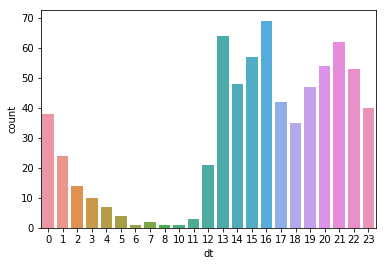

In [58]:
ses.countplot(m_2467.dt.dt.hour)
plt.show()

In [64]:
train_m_2467 = train[train.mall_id=="m_2467"]

In [91]:
train_m_2467.shape

(21430, 21)

In [75]:
train_m_2467[train_m_2467.dt.dt.hour == 7].shop_id.unique()

array(['s_46595'], dtype=object)

In [80]:
testA_info = load_testA()

In [81]:
preprocess_basic_time(testA_info)
preprocess_basic_wifi(testA_info)

,row_id,user_id,mall_id,time_stamp,longitude,latitude,wifi_infos,dt,weekday,hour,is_weekend,basic_wifi_info,wifi_size,use_wifi_size,no_use_wifi_size,use_wifi_freq,no_use_wifi_freq
0,118742,u_30097142,m_3916,2017-09-05 13:00,122.141011,39.818847,b_34366982|-82|false;b_37756289|-53|false;b_41...,2017-09-05 13:00:00,1,13,0,"(10, [], [(b_34366982, -82), (b_37756289, -53)...",10,0,10,0.000000,1.000000
1,118743,u_30097803,m_5085,2017-09-06 13:10,118.191907,32.855858,b_36722251|-81|false;b_10537579|-75|false;b_43...,2017-09-06 13:10:00,2,13,0,"(10, [], [(b_36722251, -81), (b_10537579, -75)...",10,0,10,0.000000,1.000000
2,118744,u_30097889,m_4033,2017-09-06 17:40,119.192110,32.424667,b_30026291|-74|false;b_30026290|-74|false;b_36...,2017-09-06 17:40:00,2,17,0,"(10, [], [(b_30026291, -74), (b_30026290, -74)...",10,0,10,0.000000,1.000000
3,118745,u_30098996,m_4515,2017-09-03 12:10,120.612201,34.055249,b_33412374|-77|false;b_22084893|-86|false;b_52...,2017-09-03 12:10:00,6,12,1,"(10, [], [(b_33412374, -77), (b_22084893, -86)...",10,0,10,0.000000,1.000000
4,118746,u_30099170,m_7168,2017-09-02 20:40,116.861989,40.326858,b_19882704|-77|false;b_2241462|-49|false;b_585...,2017-09-02 20:40:00,5,20,1,"(10, [(b_585683, -64)], [(b_19882704, -77), (b...",10,1,9,0.100000,0.900000
5,118747,u_30099328,m_4079,2017-09-01 13:20,117.365336,40.638300,b_33503892|-50|false;b_30058118|-66|false;b_75...,2017-09-01 13:20:00,4,13,0,"(10, [], [(b_33503892, -50), (b_30058118, -66)...",10,0,10,0.000000,1.000000
6,118748,u_30099795,m_2333,2017-09-06 12:20,120.494443,36.455076,b_44437637|-70|false;b_56327744|-67|false;b_45...,2017-09-06 12:20:00,2,12,0,"(10, [(b_56323432, -57)], [(b_44437637, -70), ...",10,1,9,0.100000,0.900000
7,118749,u_30099923,m_1175,2017-09-07 21:10,120.744362,30.814718,b_8763036|-91|false;b_8324226|-48|false;b_3340...,2017-09-07 21:10:00,3,21,0,"(10, [], [(b_8763036, -91), (b_8324226, -48), ...",10,0,10,0.000000,1.000000
8,118750,u_30100284,m_1409,2017-09-03 10:30,122.309345,32.086750,b_2159244|-82|false;b_23387932|-93|false;b_169...,2017-09-03 10:30:00,6,10,1,"(10, [], [(b_2159244, -82), (b_23387932, -93),...",10,0,10,0.000000,1.000000
9,118751,u_30100446,m_3517,2017-09-02 19:00,104.417599,31.286157,b_34749981|-68|false;b_45712058|-86|false;b_55...,2017-09-02 19:00:00,5,19,1,"(10, [], [(b_34749981, -68), (b_45712058, -86)...",10,0,10,0.000000,1.000000


In [82]:
test_m_2467 = testA_info[testA_info.mall_id == "m_2467"]

In [85]:
test_m_2467[test_m_2467.dt.dt.hour<=7].row_id

5195      123937
13938     132680
16378     135120
22074     140816
24625     143367
27574     146316
42794      69182
48786      75174
62268      35882
67439     172986
77268     182815
77271     182818
81915     200656
114138    114139
126821     60855
130566     64600
133339    186113
135849    188623
140979    193753
140980    193754
141324    194098
142029    194803
150678     45132
150679     45133
174277    213858
175015    214596
182946    222527
185395    159010
222609     11517
222610     11518
222611     11519
222613     11521
222614     11522
222615     11523
222616     11524
222617     11525
228774    228775
242961    242962
271299    271300
274707    274708
285175    285176
291889    291890
304253    304254
304278    304279
305929    305930
306125    306126
321749    321750
322952    322953
331569    331570
355534    355535
364803    364804
377919    377920
398182    398183
403213    403214
404987    404988
406940    406941
409727    409728
424318    424319
449436    4494

In [86]:
predict = pd.read_csv("../result/online/lightgbm_5fold_wifi_sig_lonlat_fnum_class_1_lr0.02_leaves31_ff0.8_bf0.8_bfq5_es3.csv")

In [90]:
predict[np.in1d(predict.row_id,test_m_2467[test_m_2467.dt.dt.hour<=7].row_id)]

,row_id,shop_id
11516,11517,s_444858
11517,11518,s_444858
11518,11519,s_1053858
11520,11521,s_1053858
11521,11522,s_1053858
11522,11523,s_444858
11523,11524,s_1053858
11524,11525,s_1053858
35881,35882,s_46595
45131,45132,s_46595


In [92]:
train.mall_id.shape

(1138015,)

In [93]:
shop = load_shop_info()

In [94]:
shop.mall_id.unique().shape

(97,)

In [97]:
mall_ids = shop.mall_id.unique()

In [102]:
for _mall_id in mall_ids:
    part_train = train[train.mall_id == _mall_id]
    print _mall_id
    for i in range(9):
        print i
        print part_train[part_train.dt.dt.hour == 0].shop_id.unique()

m_690
0
['s_824128' 's_3708149' 's_495780' 's_3683594' 's_1228218']
1
['s_824128' 's_3708149' 's_495780' 's_3683594' 's_1228218']
2
['s_824128' 's_3708149' 's_495780' 's_3683594' 's_1228218']
3
['s_824128' 's_3708149' 's_495780' 's_3683594' 's_1228218']
4
['s_824128' 's_3708149' 's_495780' 's_3683594' 's_1228218']
5
['s_824128' 's_3708149' 's_495780' 's_3683594' 's_1228218']
6
['s_824128' 's_3708149' 's_495780' 's_3683594' 's_1228218']
7
['s_824128' 's_3708149' 's_495780' 's_3683594' 's_1228218']
8
['s_824128' 's_3708149' 's_495780' 's_3683594' 's_1228218']
m_6587
0
['s_134834' 's_889824' 's_3786884' 's_3740894' 's_3887252' 's_3131512'
 's_474193' 's_3758973' 's_72613']
1
['s_134834' 's_889824' 's_3786884' 's_3740894' 's_3887252' 's_3131512'
 's_474193' 's_3758973' 's_72613']
2
['s_134834' 's_889824' 's_3786884' 's_3740894' 's_3887252' 's_3131512'
 's_474193' 's_3758973' 's_72613']
3
['s_134834' 's_889824' 's_3786884' 's_3740894' 's_3887252' 's_3131512'
 's_474193' 's_3758973' 's_72613

m_4079
0
[]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
m_5085
0
[]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
m_2415
0
['s_49408' 's_3039617' 's_1259270']
1
['s_49408' 's_3039617' 's_1259270']
2
['s_49408' 's_3039617' 's_1259270']
3
['s_49408' 's_3039617' 's_1259270']
4
['s_49408' 's_3039617' 's_1259270']
5
['s_49408' 's_3039617' 's_1259270']
6
['s_49408' 's_3039617' 's_1259270']
7
['s_49408' 's_3039617' 's_1259270']
8
['s_49408' 's_3039617' 's_1259270']
m_4543
0
['s_3505136' 's_350209' 's_1071640' 's_426105']
1
['s_3505136' 's_350209' 's_1071640' 's_426105']
2
['s_3505136' 's_350209' 's_1071640' 's_426105']
3
['s_3505136' 's_350209' 's_1071640' 's_426105']
4
['s_3505136' 's_350209' 's_1071640' 's_426105']
5
['s_3505136' 's_350209' 's_1071640' 's_426105']
6
['s_3505136' 's_350209' 's_1071640' 's_426105']
7
['s_3505136' 's_350209' 's_1071640' 's_426105']
8
['s_3505136' 's_350209' 's_1071640' 's_426105']
m_7168
0
[]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
m_2123
0
['s_3023658' 's_2588' 's_1455

m_615
0
[]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
m_4121
0
['s_223641' 's_3966311' 's_3961901']
1
['s_223641' 's_3966311' 's_3961901']
2
['s_223641' 's_3966311' 's_3961901']
3
['s_223641' 's_3966311' 's_3961901']
4
['s_223641' 's_3966311' 's_3961901']
5
['s_223641' 's_3966311' 's_3961901']
6
['s_223641' 's_3966311' 's_3961901']
7
['s_223641' 's_3966311' 's_3961901']
8
['s_223641' 's_3966311' 's_3961901']
m_9054
0
['s_621288' 's_548921']
1
['s_621288' 's_548921']
2
['s_621288' 's_548921']
3
['s_621288' 's_548921']
4
['s_621288' 's_548921']
5
['s_621288' 's_548921']
6
['s_621288' 's_548921']
7
['s_621288' 's_548921']
8
['s_621288' 's_548921']
m_4515
0
['s_688107' 's_641900' 's_573865' 's_3033228' 's_414544' 's_11314'
 's_436701']
1
['s_688107' 's_641900' 's_573865' 's_3033228' 's_414544' 's_11314'
 's_436701']
2
['s_688107' 's_641900' 's_573865' 's_3033228' 's_414544' 's_11314'
 's_436701']
3
['s_688107' 's_641900' 's_573865' 's_3033228' 's_414544' 's_11314'
 's_436701']
4
['s_688107' '

m_7374
0
['s_300452' 's_97407' 's_471858' 's_2776010' 's_756412' 's_3614133']
1
['s_300452' 's_97407' 's_471858' 's_2776010' 's_756412' 's_3614133']
2
['s_300452' 's_97407' 's_471858' 's_2776010' 's_756412' 's_3614133']
3
['s_300452' 's_97407' 's_471858' 's_2776010' 's_756412' 's_3614133']
4
['s_300452' 's_97407' 's_471858' 's_2776010' 's_756412' 's_3614133']
5
['s_300452' 's_97407' 's_471858' 's_2776010' 's_756412' 's_3614133']
6
['s_300452' 's_97407' 's_471858' 's_2776010' 's_756412' 's_3614133']
7
['s_300452' 's_97407' 's_471858' 's_2776010' 's_756412' 's_3614133']
8
['s_300452' 's_97407' 's_471858' 's_2776010' 's_756412' 's_3614133']
m_2009
0
['s_46416' 's_2918468' 's_401101']
1
['s_46416' 's_2918468' 's_401101']
2
['s_46416' 's_2918468' 's_401101']
3
['s_46416' 's_2918468' 's_401101']
4
['s_46416' 's_2918468' 's_401101']
5
['s_46416' 's_2918468' 's_401101']
6
['s_46416' 's_2918468' 's_401101']
7
['s_46416' 's_2918468' 's_401101']
8
['s_46416' 's_2918468' 's_401101']
m_6337
0
['s_4

m_3517
0
['s_1166591' 's_3952507' 's_3663014' 's_194923']
1
['s_1166591' 's_3952507' 's_3663014' 's_194923']
2
['s_1166591' 's_3952507' 's_3663014' 's_194923']
3
['s_1166591' 's_3952507' 's_3663014' 's_194923']
4
['s_1166591' 's_3952507' 's_3663014' 's_194923']
5
['s_1166591' 's_3952507' 's_3663014' 's_194923']
6
['s_1166591' 's_3952507' 's_3663014' 's_194923']
7
['s_1166591' 's_3952507' 's_3663014' 's_194923']
8
['s_1166591' 's_3952507' 's_3663014' 's_194923']
m_2715
0
['s_701810']
1
['s_701810']
2
['s_701810']
3
['s_701810']
4
['s_701810']
5
['s_701810']
6
['s_701810']
7
['s_701810']
8
['s_701810']
m_5810
0
['s_404908' 's_2000880']
1
['s_404908' 's_2000880']
2
['s_404908' 's_2000880']
3
['s_404908' 's_2000880']
4
['s_404908' 's_2000880']
5
['s_404908' 's_2000880']
6
['s_404908' 's_2000880']
7
['s_404908' 's_2000880']
8
['s_404908' 's_2000880']
m_5767
0
['s_469710' 's_457958' 's_3732389']
1
['s_469710' 's_457958' 's_3732389']
2
['s_469710' 's_457958' 's_3732389']
3
['s_469710' 's_4579